
# **<center><font style="color:rgb(100,109,254)">Human Action Recognition in Videos using Keras (CNN + LSTM)</font> </center>**

<center>
<img src='https://drive.google.com/uc?export=download&id=1ucdFpzyVbzTa7kPYsJ2av-gRKgd84ICA'></center>

## **<font style="color:rgb(134,19,348)"> Outline </font>**

- **`Step 1:` Visualize the Data with its Labels**

- **`Step 2:` Preprocess the Dataset**

- **`Step 3:` Split the Data into Train and Test Set**

- **`Step 4:` Implement the ConvLSTM Approach**

    - **`Step 4.1:` Construct the Model**
    
    - **`Step 4.2:` Compile & Train the Model**
    
    - **`Step 4.3:` Plot Model’s Loss & Accuracy Curves**

- **`Step 5:` implement the LRCN Approach**
 
    - **`Step 5.1:` Construct the Model**
    
    - **`Step 5.2:` Compile & Train the Model**
    
    - **`Step 5.3:` Plot Model’s Loss & Accuracy Curves**
    
- **`Step 6:` Test the Best Performing Model on YouTube videos**

Alright, so without further ado, let's get started.

### **<font style="color:rgb(134,19,348)"> Import the Libraries</font>**

We will start by installing and importing the required libraries.

In [7]:
!pip3 install tensorflow-gpu==2.11


     |████████████████████████████████| 588.3 MB 71 kB/s  eta 0:00:012��█████████████████████  | 549.9 MB 1.1 MB/s eta 0:00:36
     |████████████████████████████████| 17.3 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 903 kB/s eta 0:00:01
     |████████████████████████████████| 439 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 22.9 MB 480 kB/s eta 0:00:01
     |████████████████████████████████| 48 kB 3.8 MB/s eta

In [2]:
import tensorflow as tf 
print("Tensorflow Version : ", tf.__version__)

Tensorflow Version :  2.12.0


In [2]:
# Discard the output of this cell.
#%%capture

# Install the required libraries.
!pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot
!pip install git+https://github.com/TahaAnwar/pafy.git#egg=pafy

     |████████████████████████████████| 585.9 MB 21 kB/s  eta 0:00:01     |█████████████▊                  | 250.9 MB 5.0 MB/s eta 0:01:07     |████████████████████████▍       | 447.0 MB 439 kB/s eta 0:05:16
     |████████████████████████████████| 67.9 MB 6.8 MB/s eta 0:00:01�███████████▎       | 51.5 MB 9.8 MB/s eta 0:00:02
     |████████████████████████████████| 1.9 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 388 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 5.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 304 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 4.5 MB/s eta 0:00:01
   

  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110730 sha256=0a388bc679ca87d2b780a8f5076b0ef738bf84f964c62e08b8ba334496ff718b
  Stored in directory: /home/aman/.cache/pip/wheels/e4/a4/db/0368d3a04033da662e13926594b3a8cf1aa4ffeefe570cfac1
  Created wheel for jax: filename=jax-0.4.12-py3-none-any.whl size=1498447 sha256=3de9e118df0c0baf1dbe1d7209dacbbccc1e2c67f3385c7d1b5aa26136962386
  Stored in directory: /home/aman/.cache/pip/wheels/cd/5a/a8/88d7a5c8d35f5a5e9cddec186ce76d5e303e0462d8a6c827bb
Successfully built moviepy jax
ERROR: tensorflow-gpu 2.11.0 has requirement keras<2.12,>=2.11.0, but you'll have keras 2.12.0 which is incompatible.
ERROR: tensorflow-gpu 2.11.0 has requirement protobuf<3.20,>=3.9.2, but you'll have protobuf 4.23.2 which is incompatible.
ERROR: tensorflow-gpu 2.11.0 has requirement tensorboard<2.12,>=2.11, but you'll have tensorboard 2.12.3 which is incompatible.
ERROR: tensorflow-gpu 2.11.0 has requirement tensorflow-estimator<2.12,>=2.1

In [3]:
for device in tf.config.list_physical_devices():
    print(device)

is_cuda_enabled = tf.test.is_built_with_cuda()
if is_cuda_enabled:
    print("TensorFlow is built with CUDA support.")

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


TensorFlow is built with CUDA support.


In [1]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

And will set `Numpy`, `Python`, and `Tensorflow` seeds to get consistent results on every execution.

In [2]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

## **<font style="color:rgb(134,19,348)">Step 1: Visualize the Data with its Labels</font>**

In the first step, we will visualize the data along with labels to get an idea about what we will be dealing with. We will be using the [UCF50 - Action Recognition Dataset](https://www.crcv.ucf.edu/data/UCF50.php), consisting of realistic videos taken from youtube which differentiates this data set from most of the other available action recognition data sets as they are not realistic and are staged by actors. The Dataset contains:

*   **`50`** Action Categories

*   **`25`** Groups of Videos per Action Category

*   **`133`** Average Videos per Action Category

*   **`199`** Average Number of Frames per Video

*   **`320`** Average Frames Width per Video

*   **`240`** Average Frames Height per Video

*   **`26`** Average Frames Per Seconds per Video

For visualization, we will pick `20` random categories from the dataset and a random video from each selected category and will visualize the first frame of the selected videos with their associated labels written. This way we’ll be able to visualize a subset ( `20` random videos ) of the dataset.

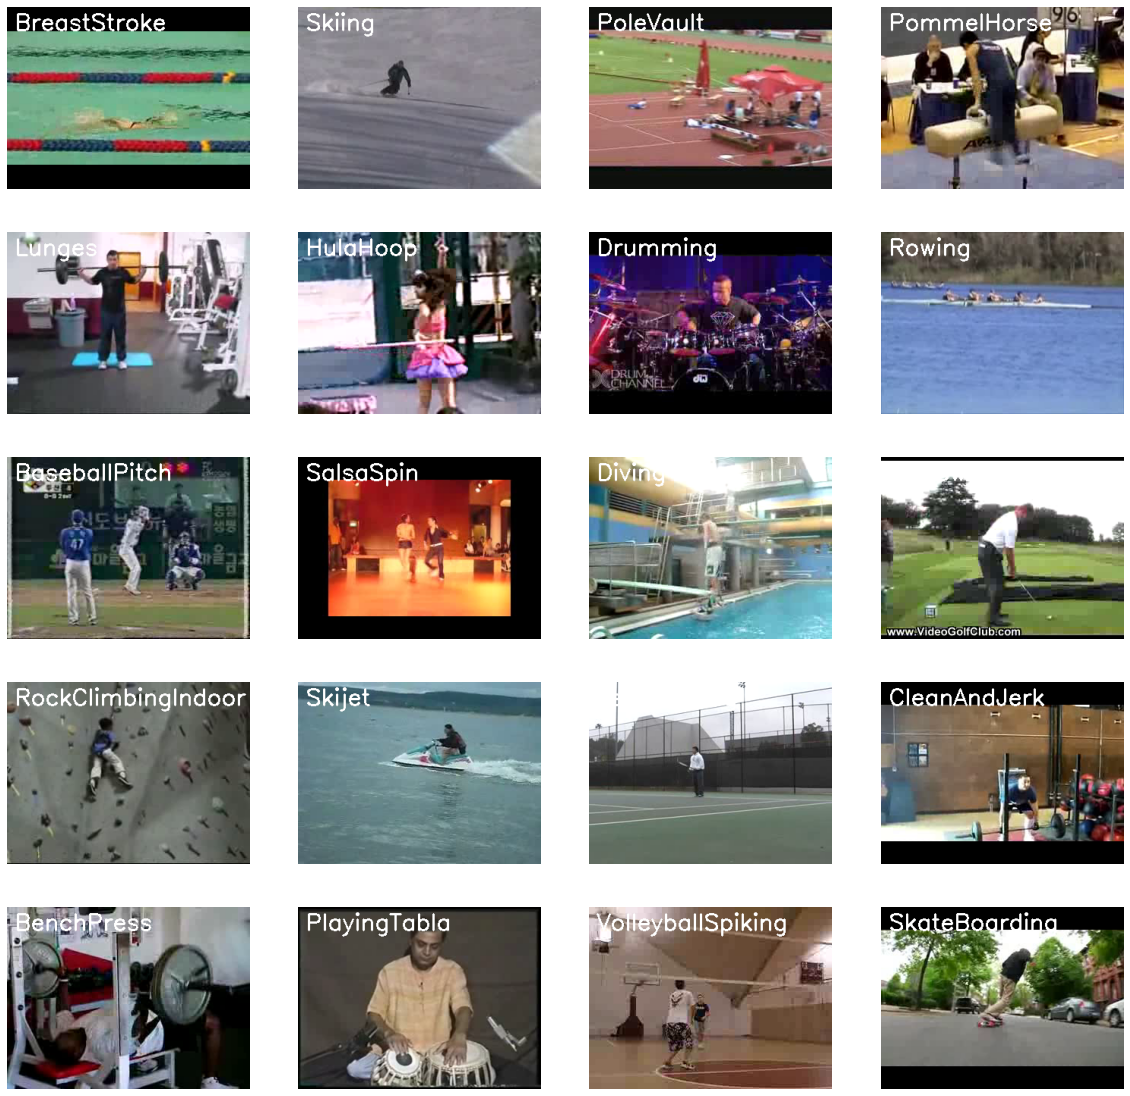

In [3]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('UCF50')

# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')
    
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    video_reader.release()

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

## **<font style="color:rgb(134,19,348)">Step 2: Preprocess the Dataset</font>**

Next, we will perform some preprocessing on the dataset. First, we will read the video files from the dataset and resize the frames of the videos to a fixed width and height, to reduce the computations and normalized the data to range `[0-1]` by dividing the pixel values with `255`, which makes convergence faster while training the network.

*But first, let's initialize some constants.*

In [4]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

# Specify the directory containing the UCF50 dataset. 
DATASET_DIR = "UCF50"

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
CLASSES_LIST = ["WalkingWithDog", "TaiChi", "Swing", "HorseRace"]

**Note:** *The **`IMAGE_HEIGHT`**, **`IMAGE_WIDTH`** and **`SEQUENCE_LENGTH`** constants can be increased for better results, although increasing the sequence length is only effective to a certain point, and increasing the values will result in the process being more computationally expensive.*

### **<font style="color:rgb(134,19,348)">Create a Function to Extract, Resize & Normalize Frames</font>**

We will create a function **`frames_extraction()`** that will create a list containing the resized and normalized frames of a video whose path is passed to it as an argument. The function will read the video file frame by frame, although not all frames are added to the list as we will only need an evenly distributed sequence length of frames. 

In [5]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()

    # Return the frames list.
    return frames_list

### **<font style="color:rgb(134,19,348)">Create a Function for Dataset Creation</font>**

Now we will create a function **`create_dataset()`** that will iterate through all the classes specified in the **`CLASSES_LIST`** constant and will call the function  **`frame_extraction()`** on every video file of the selected classes and return the frames (**`features`**), class index ( **`labels`**), and video file path (**`video_files_paths`**).

In [6]:
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
    
    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

Now we will utilize the function **`create_dataset()`** created above to extract the data of the selected classes and create the required dataset.

In [7]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: WalkingWithDog
Extracting Data of Class: TaiChi
Extracting Data of Class: Swing
Extracting Data of Class: HorseRace


Now we will convert `labels` (class indexes) into one-hot encoded vectors.

In [8]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

## **<font style="color:rgb(134,19,348)">Step 3: Split the Data into Train and Test Set</font>**

As of now, we have the required **`features`** (a NumPy array containing all the extracted frames of the videos) and **`one_hot_encoded_labels`** (also a Numpy array containing all class labels in one hot encoded format). So now, we will split our data to create training and testing sets. We will also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [9]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

## **<font style="color:rgb(134,19,348)">Step 4: Implement the ConvLSTM Approach</font>**

In this step, we will implement the first approach by using a combination of ConvLSTM cells. A ConvLSTM cell is a variant of an LSTM network that contains convolutions operations in the network. it is an LSTM with convolution embedded in the architecture, which makes it capable of identifying spatial features of the data while keeping into account the temporal relation. 

<center>
<img src="https://drive.google.com/uc?export=view&id=1KHN_JFWJoJi1xQj_bRdxy2QgevGOH1qP" width= 500px>
</center>


For video classification, this approach effectively captures the spatial relation in the individual frames and the temporal relation across the different frames. As a result of this convolution structure, the ConvLSTM is capable of taking in 3-dimensional input `(width, height, num_of_channels)` whereas a simple LSTM only takes in 1-dimensional input hence an LSTM is incompatible for modeling Spatio-temporal data on its own.

You can read the paper [**Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting**](https://arxiv.org/abs/1506.04214v1) by **Xingjian Shi** (NIPS 2015), to learn more about this architecture.


### **<font style="color:rgb(134,19,348)">Step 4.1: Construct the Model</font>**


To construct the model, we will use Keras [**`ConvLSTM2D`**](https://keras.io/api/layers/recurrent_layers/conv_lstm2d) recurrent layers. The **`ConvLSTM2D`** layer also takes in the number of filters and kernel size required for applying the convolutional operations. The output of the layers is flattened in the end and is fed to the **`Dense`** layer with softmax activation which outputs the probability of each action category. 

We will also use **`MaxPooling3D`** layers to reduce the dimensions of the frames and avoid unnecessary computations and **`Dropout`** layers to prevent [overfitting](https://en.wikipedia.org/wiki/Overfitting) the model on the data. The architecture is a simple one and has a small number of trainable parameters. This is because we are only dealing with a small subset of the dataset which does not require a large-scale model.

In [21]:
def create_convlstm_model():
    '''
    This function will construct the required convlstm model.
    Returns:
        model: It is the required constructed convlstm model.
    '''

    # We will use a Sequential model for model construction
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(Flatten()) 
    
    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))
    
    ########################################################################################################################
     
    # Display the models summary.
    model.summary()
    
    # Return the constructed convlstm model.
    return model

Now we will utilize the function **`create_convlstm_model()`** created above, to construct the required `convlstm` model.

In [22]:
# Construct the required convlstm model.
convlstm_model = create_convlstm_model()

# Display the success message. 
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 20, 31, 31, 4)    0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 20, 31, 31, 4)    0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 29, 29, 8)     3488      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 20, 15, 15, 8)    0         
 3D)                                                             
                                                        

#### **<font style="color:rgb(134,19,348)">Check Model’s Structure:</font>**


Now we will use the **`plot_model()`** function, to check the structure of the constructed model, this is helpful while constructing a complex network and making that the network is created correctly.

In [25]:
# Plot the structure of the contructed model.
plot_model(convlstm_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### **<font style="color:rgb(134,19,348)">Step 4.2: Compile & Train the Model</font>**

Next, we will add an early stopping callback to prevent [overfitting](https://en.wikipedia.org/wiki/Overfitting) and start the training after compiling the model.

In [26]:
# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4,
                                                     shuffle = True, validation_split = 0.2, 
                                                     callbacks = [early_stopping_callback])

Epoch 1/50
73/73 [==============================] - 11s 111ms/step - loss: 1.3790 - accuracy: 0.3116 - val_loss: 1.3173 - val_accuracy: 0.3562
Epoch 2/50
73/73 [==============================] - 8s 106ms/step - loss: 1.3278 - accuracy: 0.4384 - val_loss: 1.3320 - val_accuracy: 0.4110
Epoch 3/50
73/73 [==============================] - 8s 108ms/step - loss: 1.1772 - accuracy: 0.5479 - val_loss: 1.2253 - val_accuracy: 0.4384
Epoch 4/50
73/73 [==============================] - 8s 109ms/step - loss: 1.0317 - accuracy: 0.5616 - val_loss: 1.1007 - val_accuracy: 0.5205
Epoch 5/50
73/73 [==============================] - 8s 109ms/step - loss: 0.8634 - accuracy: 0.6541 - val_loss: 1.0393 - val_accuracy: 0.5616
Epoch 6/50
73/73 [==============================] - 8s 111ms/step - loss: 0.7174 - accuracy: 0.7192 - val_loss: 0.9212 - val_accuracy: 0.5890
Epoch 7/50
73/73 [==============================] - 8s 112ms/step - loss: 0.5624 - accuracy: 0.7740 - val_loss: 0.9456 - val_accuracy: 0.6301
Epoch

#### **<font style="color:rgb(134,19,348)">Evaluate the Trained Model</font>**

After training, we will evaluate the model on the test set.

In [27]:
# Evaluate the trained model.
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

4/4 [==============================] - 0s 117ms/step - loss: 0.7770 - accuracy: 0.7869


#### **<font style="color:rgb(134,19,348)">Save the Model</font>**

Now we will save the model to avoid training it from scratch every time we need the model.

In [28]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'convlstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save your Model.
convlstm_model.save(model_file_name)

### **<font style="color:rgb(134,19,348)">Step 4.3: Plot Model’s Loss & Accuracy Curves</font>**


Now we will create a function **`plot_metric()`** to visualize the training and validation metrics. We already have separate metrics from our training and validation steps so now we just have to visualize them.

In [29]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

Now we will utilize the function **`plot_metric()`** created above, to visualize and understand the metrics.

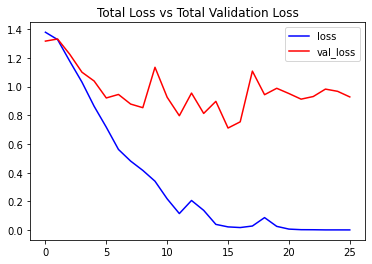

In [30]:
# Visualize the training and validation loss metrices.
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

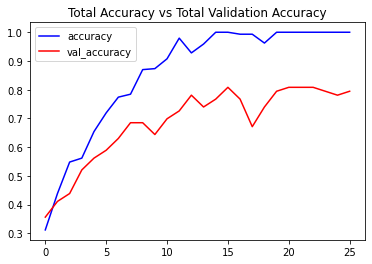

In [31]:
# Visualize the training and validation accuracy metrices.
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

## **<font style="color:rgb(134,19,348)">Step 5: Implement the LRCN Approach</font>**

In this step, we will implement the LRCN Approach by combining Convolution and LSTM layers in a single model. Another similar approach can be to use a CNN model and LSTM model trained separately. The CNN model can be used to extract spatial features from the frames in the video, and for this purpose, a pre-trained model can be used, that can be fine-tuned for the problem. And the LSTM model can then use the features extracted by CNN, to predict the action being performed in the video. 


But here, we will implement another approach known as the Long-term Recurrent Convolutional Network (LRCN), which combines CNN and LSTM layers in a single model. The Convolutional layers are used for spatial feature extraction from the frames, and the extracted spatial features are fed to LSTM layer(s) at each time-steps for temporal sequence modeling. This way the network learns spatiotemporal features directly in an end-to-end training, resulting in a robust model.

<center>
<img src='https://drive.google.com/uc?export=download&id=1I-q5yLsIoNh2chfzT7JYvra17FsXvdme'>
</center>


You can read the paper [Long-term Recurrent Convolutional Networks for Visual Recognition and Description](https://arxiv.org/abs/1411.4389?source=post_page---------------------------) by Jeff Donahue (CVPR 2015), to learn more about this architecture.

We will also use [**`TimeDistributed`**](https://keras.io/api/layers/recurrent_layers/time_distributed/) wrapper layer, which allows applying the same layer to every frame of the video independently. So it makes a layer (around which it is wrapped) capable of taking input of shape `(no_of_frames, width, height, num_of_channels)` if originally the layer's input shape was `(width, height, num_of_channels)` which is very beneficial as it allows to input the whole video into the model in a single shot. 

<center>
<img src='https://drive.google.com/uc?export=download&id=1CbauSm5XTY7ypHYBHH7rDSnJ5LO9CUWX' width=400>
</center>

### **<font style="color:rgb(134,19,348)">Step 5.1: Construct the Model</font>**

To implement our LRCN architecture, we will use time-distributed **`Conv2D`** layers which will be followed by **`MaxPooling2D`** and **`Dropout`** layers. The feature extracted from the **`Conv2D`** layers will be then flattened using the  **`Flatten`** layer and will be fed to a **`LSTM`** layer. The **`Dense`** layer with softmax activation will then use the output from the **`LSTM`** layer to predict the action being performed.

In [10]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

Now we will utilize the function **`create_LRCN_model()`** created above to construct the required `LRCN` model.

In [11]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 64, 64, 16)   448       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 20, 16, 16, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 4, 4, 32)     0

#### **<font style="color:rgb(134,19,348)">Check Model’s Structure:</font>**

Now we will use the **`plot_model()`** function to check the structure of the constructed `LRCN` model. As we had checked for the previous model.

In [12]:
# Plot the structure of the contructed LRCN model.
plot_model(LRCN_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### **<font style="color:rgb(134,19,348)">Step 5.2: Compile & Train the Model</font>**


After checking the structure, we will compile and start training the model.

In [13]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/70
73/73 [==============================] - 3s 27ms/step - loss: 1.3905 - accuracy: 0.2911 - val_loss: 1.3686 - val_accuracy: 0.4521
Epoch 2/70
73/73 [==============================] - 2s 22ms/step - loss: 1.3214 - accuracy: 0.3630 - val_loss: 1.3344 - val_accuracy: 0.3425
Epoch 3/70
73/73 [==============================] - 2s 22ms/step - loss: 1.2252 - accuracy: 0.4829 - val_loss: 1.2688 - val_accuracy: 0.3425
Epoch 4/70
73/73 [==============================] - 2s 22ms/step - loss: 1.0465 - accuracy: 0.5753 - val_loss: 1.1893 - val_accuracy: 0.3973
Epoch 5/70
73/73 [==============================] - 2s 22ms/step - loss: 0.9239 - accuracy: 0.5993 - val_loss: 0.8778 - val_accuracy: 0.6027
Epoch 6/70
73/73 [==============================] - 2s 22ms/step - loss: 0.8036 - accuracy: 0.6541 - val_loss: 0.7850 - val_accuracy: 0.6849
Epoch 7/70
73/73 [==============================] - 2s 22ms/step - loss: 0.6159 - accuracy: 0.7534 - val_loss: 0.6457 - val_accuracy: 0.7534
Epoch 8/70
73

#### **<font style="color:rgb(134,19,348)">Evaluating the trained Model</font>**

As done for the previous one, we will evaluate the `LRCN` model on the test set.

In [21]:
my_test_x = features_test[:3]
my_test_y = labels_test[:3]

In [23]:
model_evaluation_history = LRCN_model.evaluate(my_test_x, my_test_y)

1/1 [==============================] - 0s 26ms/step - loss: 0.1831 - accuracy: 1.0000


In [29]:
my_test_x[0:1].shape

(1, 20, 64, 64, 3)

In [31]:
my_test_y[0:1]

array([[1., 0., 0., 0.]], dtype=float32)

In [35]:
print(LRCN_model.predict(my_test_x[0:1]))
print(my_test_y[0:1])
print("============================")

print(LRCN_model.predict(my_test_x[1:2]))
print(my_test_y[1:2])
print("============================")

print(LRCN_model.predict(my_test_x[2:3]))
print(my_test_y[2:3])
print("============================")

1/1 [==============================] - 0s 20ms/step
[[0.6133437  0.15629946 0.01529156 0.21506533]]
[[1. 0. 0. 0.]]
1/1 [==============================] - 0s 18ms/step
[[0.02509359 0.00993627 0.00321409 0.961756  ]]
[[0. 0. 0. 1.]]
1/1 [==============================] - 0s 19ms/step
[[0.01118241 0.004061   0.00602089 0.97873574]]
[[0. 0. 0. 1.]]


# Extract time distributed wrapper and seperate model into 2 parts

In [37]:
# Get the underlying model inside the TimeDistributed wrapper
model_without_td = LRCN_model.layers[0]

# Create a new model without the TimeDistributed wrapper
LRCN_model_without_td = tf.keras.Sequential()
LRCN_model_without_td.add(model_without_td)

# Copy the weights from the wrapped model to the new model
LRCN_model_without_td.set_weights(LRCN_model.get_weights())

ValueError: You called `set_weights(weights)` on layer "sequential_1" with a weight list of length 13, but the layer was expecting 2 weights. Provided weights: [array([[[[-1.37432441e-01,  4.90210690e-02, -1.26...

In [54]:
till_lstm_layer = LRCN_model.layers[:-1]

# Access the Dense layer after the LSTM layer
dense_layer = LRCN_model.layers[-1]

# Create a new model without the TimeDistributed wrapper
new_model = tf.keras.Sequential()
new_model.add(till_lstm_layer)
new_model.add(dense_layer)

# Optionally, copy the weights from the original model to the new model
new_model.set_weights(LRCN_model.get_weights())

TypeError: The added layer must be an instance of class Layer. Received: layer=[<keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6f2e99ff10>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6f2e85bf40>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6f2e81f580>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6f2e81f820>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6f2e81ff10>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6ec42ba6d0>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6ec42bf790>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6ec42bf0a0>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6ec42cb550>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6ec42cbe80>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6ec42527f0>, <keras.layers.rnn.time_distributed.TimeDistributed object at 0x7f6ec4257910>, <keras.layers.rnn.lstm.LSTM object at 0x7f6ec4252970>] of type <class 'list'>.

In [70]:
LRCN_model.layers[:-2]

In [73]:
# Create a new model
new_model1 = tf.keras.Sequential()

# Iterate over the layers in LRCN_model except for the last layer
for layer in LRCN_model.layers[:-2]:
    if isinstance(layer, tf.keras.layers.TimeDistributed):
        # If the layer is TimeDistributed, add its underlying layer to the new model
        new_model1.add(layer.layer)
    else:
        # Otherwise, add the layer as it is to the new model
        new_model1.add(layer)

In [74]:
new_model1.layers

In [78]:
# Create a new model
new_model2 = tf.keras.Sequential()


new_model2.add(LRCN_model.layers[-2])
new_model2.add(LRCN_model.layers[-1])

In [79]:
new_model2.layers

In [81]:
# Generate dummy input data
width = 64
height = 64
channels = 3
input_shape = (width, height, channels)
dummy_input = tf.random.normal((1,) + input_shape)

# Call the new_model on the dummy input data to build the model
_ = new_model1(dummy_input)

# Get the weights from the LRCN_model
weights = []
for layer in LRCN_model.layers[:-2]:
    if isinstance(layer, tf.keras.layers.TimeDistributed):
        weights.extend(layer.layer.get_weights())
    else:
        weights.extend(layer.get_weights())

# Set the weights to the new_model
new_model1.set_weights(weights)

In [83]:
new_model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 64, 64, 16)           448       
                                                                 
 max_pooling2d (MaxPooling2D  (1, 16, 16, 16)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (1, 16, 16, 16)           0         
                                                                 
 conv2d_1 (Conv2D)           (1, 16, 16, 32)           4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 4, 4, 32)            0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (1, 4, 4, 32)           

In [87]:
# Generate dummy input data
seq = 20
features = 64
input_shape = (seq, features)
dummy_input = tf.random.normal((1,) + input_shape)

# Call the new_model on the dummy input data to build the model
_ = new_model2(dummy_input)

# Get the weights from the LRCN_model
weights = []
for layer in LRCN_model.layers[-2:]:
    if isinstance(layer, tf.keras.layers.TimeDistributed):
        weights.extend(layer.layer.get_weights())
    else:
        weights.extend(layer.get_weights())

# Set the weights to the new_model
new_model2.set_weights(weights)

In [88]:
new_model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 multiple                  12416     
                                                                 
 dense (Dense)               multiple                  132       
                                                                 
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________


In [89]:
my_test_x[0:1].shape

(1, 20, 64, 64, 3)

In [91]:
inp = my_test_x[0:1, 0:1, :, :].reshape(1, 64, 64, 3)
inp.shape

(1, 64, 64, 3)

In [93]:
new_model1.predict(inp).shape

1/1 [==============================] - 0s 13ms/step


(1, 64)

In [116]:
inp_for_lstm = np.zeros(1*20*64).reshape((1, 20, 64))
print(inp_for_lstm.shape)
for i in range(20):
    pred = new_model1.predict(my_test_x[0:1, i:i+1, :, :].reshape(1, 64, 64, 3))
    inp_for_lstm[:, i:i+1:] = pred.reshape(1, 1, 64)[:,:,:]

(1, 20, 64)
1/1 [==============================] - 0s 12ms/step


In [122]:
pred = new_model1.predict(my_test_x[0:1, i:i+1, :, :].reshape(1, 64, 64, 3))

1/1 [==============================] - 0s 14ms/step


In [102]:
new_model2.predict(inp_for_lstm)

1/1 [==============================] - 0s 275ms/step


array([[0.6133437 , 0.15629946, 0.01529156, 0.21506533]], dtype=float32)

In [125]:
new_model2.predict(inp_for_lstm)

1/1 [==============================] - 0s 13ms/step


array([[0.6133437 , 0.15629946, 0.01529156, 0.21506533]], dtype=float32)

In [124]:
LRCN_model.predict(my_test_x[0:1])

1/1 [==============================] - 0s 14ms/step


array([[0.6133437 , 0.15629946, 0.01529156, 0.21506533]], dtype=float32)

In [ ]:
[[0.6133437  0.15629946 0.01529156 0.21506533]]
[[1. 0. 0. 0.]]

In [25]:
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
print(model_evaluation_loss)

0.18310600519180298


In [21]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

4/4 [==============================] - 0s 26ms/step - loss: 0.4991 - accuracy: 0.8525


#### **<font style="color:rgb(134,19,348)">Save the Model</font>**

After that, we will save the model for future uses using the same technique we had used for the previous model.

In [22]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the Model.
LRCN_model.save(model_file_name)

### **<font style="color:rgb(134,19,348)">Step 5.3: Plot Model’s Loss & Accuracy Curves</font>**

Now we will utilize the function **`plot_metric()`** we had created above to visualize the training and validation metrics of this model.


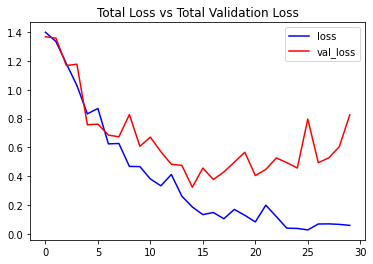

In [40]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

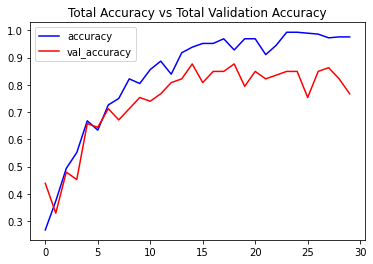

In [41]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

## **<font style="color:rgb(134,19,348)">Step 6: Test the Best Performing Model on YouTube videos</font>**

From the results, it seems that the LRCN model performed significantly well for a small number of classes. so in this step, we will put the `LRCN` model to test on some youtube videos. 

### **<font style="color:rgb(134,19,348)">Create a Function to Download YouTube Videos:</font>**

We will create a function **`download_youtube_videos()`** to download the YouTube videos first using **`pafy`** library. The library only requires a URL to a video to download it along with its associated metadata like the title of the video.

In [42]:
def download_youtube_videos(youtube_video_url, output_directory):
     '''
    This function downloads the youtube video whose URL is passed to it as an argument.
    Args:
        youtube_video_url: URL of the video that is required to be downloaded.
        output_directory:  The directory path to which the video needs to be stored after downloading.
    Returns:
        title: The title of the downloaded youtube video.
    '''
 
     # Create a video object which contains useful information about the video.
     video = pafy.new(youtube_video_url)
 
     # Retrieve the title of the video.
     title = video.title
 
     # Get the best available quality object for the video.
     video_best = video.getbest()
 
     # Construct the output file path.
     output_file_path = f'{output_directory}/{title}.mp4'
 
     # Download the youtube video at the best available quality and store it to the contructed path.
     video_best.download(filepath = output_file_path, quiet = True)
 
     # Return the video title.
     return title

### **<font style="color:rgb(134,19,348)">Download a Test Video:</font>**

Now we will utilize the function **`download_youtube_videos()`** created above to download a youtube video on which the `LRCN` model will be tested.

In [43]:
# Make the Output directory if it does not exist
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)

# Download a YouTube Video.
video_title = download_youtube_videos('https://www.youtube.com/watch?v=8u0qjmHIOcE', test_videos_directory)

# Get the YouTube Video's path we just downloaded.
input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'

ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


OSError: ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.

### **<font style="color:rgb(134,19,348)">Create a Function To Perform Action Recognition on Videos</font>**

Next, we will create a function **`predict_on_video()`** that will simply read a video frame by frame from the path passed in as an argument and will perform action recognition on video and save the results.

In [23]:
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform action recognition on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize the VideoWriter Object to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))

    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():

        # Read the frame.
        ok, frame = video_reader.read() 
        
        # Check if frame is not read properly then break the loop.
        if not ok:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255

        # Appending the pre-processed frame into the frames list.
        frames_queue.append(normalized_frame)

        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(frames_queue) == SEQUENCE_LENGTH:

            # Pass the normalized frames to the model and get the predicted probabilities.
            predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_queue, axis = 0))[0]

            # Get the index of class with highest probability.
            predicted_label = np.argmax(predicted_labels_probabilities)

            # Get the class name using the retrieved index.
            predicted_class_name = CLASSES_LIST[predicted_label]

        # Write predicted class name on top of the frame.
        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Write The frame into the disk using the VideoWriter Object.
        video_writer.write(frame)
        
    # Release the VideoCapture and VideoWriter objects.
    video_reader.release()
    video_writer.release()

### **<font style="color:rgb(134,19,348)">Perform Action Recognition on the Test Video</font>**

Now we will utilize the function **`predict_on_video()`** created above to perform action recognition on the test video we had downloaded using the function **`download_youtube_videos()`** and display the output video with the predicted action overlayed on it.

In [25]:
# Construct the output video path.
#output_video_file_path = f'{test_videos_directory}/{video_title}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'

output_video_file_path = "/home/aman/ai/lstm-rnn/output.mp4"
input_video_file_path = "/home/aman/ai/lstm-rnn/UCF50/BaseballPitch/v_BaseballPitch_g02_c04.avi"

# Perform Action Recognition on the Test Video.
predict_on_video(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)

# Display the output video.
VideoFileClip(output_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()

1/1 [==============================] - 0s 13ms/step
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


### **<font style="color:rgb(134,19,348)">Create a Function To Perform a Single Prediction on Videos</font>**


Now let's create a function that will perform a single prediction for the complete videos. We will extract evenly distributed **N** **`(SEQUENCE_LENGTH)`** frames from the entire video and pass them to the `LRCN` model. This approach is really useful when you are working with videos containing only one activity as it saves unnecessary computations and time in that scenario.  

In [ ]:
# Create a TensorFlow Dataset from your data
dataset = tf.data.Dataset.from_tensor_slices((X, y))

# Define any preprocessing steps if needed
# For example, you can normalize the input data
dataset = dataset.map(lambda x, y: (x / x.max(), y))

# Shuffle and batch the dataset
batch_size = 32
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.batch(batch_size)

# Repeat the dataset indefinitely (optional)
dataset = dataset.repeat()

# Create an iterator over the dataset
iterator = iter(dataset)

# Get a batch of data
inputs, targets = next(iterator)def predict_single_action(video_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform single action recognition prediction on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Declare a list to store video frames we will extract.
    frames_list = []
    
    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Get the number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

    # Iterating the number of times equal to the fixed length of sequence.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Read a frame.
        success, frame = video_reader.read() 

        # Check if frame is not read properly then break the loop.
        if not success:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255
        
        # Appending the pre-processed frame into the frames list
        frames_list.append(normalized_frame)

    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_list, axis = 0))[0]

    # Get the index of class with highest probability.
    predicted_label = np.argmax(predicted_labels_probabilities)

    # Get the class name using the retrieved index.
    predicted_class_name = CLASSES_LIST[predicted_label]
    
    # Display the predicted action along with the prediction confidence.
    print(f'Action Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')
        
    # Release the VideoCapture object. 
    video_reader.release()

### **<font style="color:rgb(134,19,348)">Perform Single Prediction on a Test Video</font>**

Now we will utilize the function **`predict_single_action()`** created above to perform a single prediction on a complete youtube test video that we will download using the function **`download_youtube_videos()`**, we had created above.

In [ ]:
# Download the youtube video.
video_title = download_youtube_videos('https://youtu.be/fc3w827kwyA', test_videos_directory)

# Construct tihe nput youtube video path
input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'

# Perform Single Prediction on the Test Video.
predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

# Display the input video.
VideoFileClip(input_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()

#  <center> <font style="color:rgb(234,19,148)">Join My Upcoming Computer Vision For Building Cutting Edge Applications Course</font>   </center>

A Course that goes beyond basic applications and teaches you how to create some next-level apps that utilize physics, deep learning (LSTM + CNN) + classical image processing, hand and body gestures to do a variety of very interesting things.
<center>
<img src='https://drive.google.com/uc?export=download&id=1GYO8Rg6l1ClLmEtPQz7Mwve-aSt9vvId'></center>

<br>
<br>

<center>  <a href="https://www.getdrip.com/forms/677961673/submissions/new"> <button>Join the Waitlist!</button>
</a></center>
    


# My Expiment

In [34]:
import tensorflow as tf
import os
from PIL import Image

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((desired_width, desired_height))  # Adjust the desired width and height as per your needs
    img = img.convert('RGB')  # Convert to RGB if needed
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img.close()
    return img_array

def create_dataset(data_path, batch_size, shuffle=True, repeat=True):
    image_paths = []
    for class_folder in os.listdir(data_path):
        class_folder_path = os.path.join(data_path, class_folder)
        print("i have run")
        for seq_folder in os.listdir(class_folder_path):
            seq_folder_path = os.path.join(class_folder_path, seq_folder)
            seq_images = [os.path.join(seq_folder_path, img_file) for img_file in os.listdir(seq_folder_path)]
            image_paths.extend(seq_images)
        print(image_paths)

    dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    dataset = dataset.map(load_and_preprocess_image)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(image_paths))
    dataset = dataset.batch(batch_size)

    if repeat:
        dataset = dataset.repeat()

    return dataset


In [35]:
data_path = '/home/aman/ai/lstm-rnn/seq_data/train'
batch_size = 32

dataset = create_dataset(data_path, batch_size)


i have run
['/home/aman/ai/lstm-rnn/seq_data/train/class1/seq4 (9th copy)/images_1_80x60 (3rd copy).jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq4 (9th copy)/images_1_80x60 (4th copy).jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq4 (9th copy)/images_1_80x60 (copy).jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq4 (9th copy)/images_1_80x60 (another copy).jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq4 (9th copy)/images_1_80x60.jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq1 (28th copy)/images_1_80x60 (3rd copy).jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq1 (28th copy)/images_1_80x60 (4th copy).jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq1 (28th copy)/images_1_80x60 (copy).jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq1 (28th copy)/images_1_80x60 (another copy).jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq1 (28th copy)/images_1_80x60.jpg', '/home/aman/ai/lstm-rnn/seq_data/train/class1/seq3 (33rd copy)/im

AttributeError: in user code:

    File "<ipython-input-30-8935e59c034d>", line 6, in load_and_preprocess_image  *
        img = Image.open(image_path)
    File "/home/aman/.local/lib/python3.8/site-packages/PIL/Image.py", line 3242, in open  **
        fp = io.BytesIO(fp.read())

    AttributeError: 'Tensor' object has no attribute 'read'


In [39]:
labels_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [40]:
data_path = "/home/aman/ai/lstm-rnn/seq_data/train"

In [70]:
import numpy as np
CLASS_NUM = 4
np.random.randint(CLASS_NUM)

2

In [94]:
CLASS_NUM = 4
class_name_list = os.listdir(data_path)
print(class_list)
#for batch_num in range(batch_size) :
seq_img_path_list = []
label_list = []
for label, folder_name in enumerate(os.listdir(data_path)):
    #print(label)
    for seq_img_path in os.listdir(data_path+"/"+folder_name):
        #print(seq_img_path)
        seq_img_path_list.append(seq_img_path)
        label_list.append(label)
        #for img_path in os.listdir(data_path+"/"+folder_name+seq_img_path):
            
        
        #break
    

['class1', 'class3', 'class0', 'class2']


In [91]:
data_list = list(zip(label_list, seq_img_path_list))
random.shuffle(data_list)

In [95]:
data_list[0][1]

'seq3 (37th copy)'

In [89]:

for batch in range(batch_size):
    for data in data_list:
        seq_img_path = data_path+"/"+class_name_list[data[0]+"/"+data[1]

[(2, 'seq2 (57th copy)'),
 (0, 'seq3 (44th copy)'),
 (2, 'seq3 (51st copy)'),
 (0, 'seq2 (54th copy)'),
 (2, 'seq4 (38th copy)'),
 (1, 'seq4 (23rd copy)'),
 (2, 'seq4 (7th copy)'),
 (2, 'seq4 (18th copy)'),
 (2, 'seq3 (18th copy)'),
 (0, 'seq4 (28th copy)'),
 (3, 'seq4 (32nd copy)'),
 (2, 'seq4 (copy)'),
 (1, 'seq4 (28th copy)'),
 (2, 'seq3 (28th copy)'),
 (3, 'seq3 (31st copy)'),
 (3, 'seq2 (37th copy)'),
 (3, 'seq1 (53rd copy)'),
 (3, 'seq1 (22nd copy)'),
 (3, 'seq2 (5th copy)'),
 (1, 'seq3 (40th copy)'),
 (0, 'seq4 (57th copy)'),
 (2, 'seq3 (14th copy)'),
 (3, 'seq2 (32nd copy)'),
 (2, 'seq3 (16th copy)'),
 (3, 'seq4 (22nd copy)'),
 (0, 'seq2 (31st copy)'),
 (0, 'seq4 (36th copy)'),
 (1, 'seq3 (22nd copy)'),
 (1, 'seq1 (19th copy)'),
 (3, 'seq4 (15th copy)'),
 (0, 'seq3 (40th copy)'),
 (2, 'seq3 (17th copy)'),
 (1, 'seq4 (47th copy)'),
 (1, 'seq3 (3rd copy)'),
 (3, 'seq4 (9th copy)'),
 (3, 'seq4 (45th copy)'),
 (3, 'seq1 (20th copy)'),
 (1, 'seq2 (52nd copy)'),
 (1, 'seq3 (6th copy)

In [78]:
len(seq_img_path_list)

1024

In [86]:
label_list[0]

0

In [84]:
seq_img_path_list[0]

'class1/seq4 (9th copy)'

In [80]:
len(label_list)

1024

In [98]:
# Create a TensorFlow Dataset from your data
dataset = tf.data.Dataset.from_tensor_slices((label_list, seq_img_path_list))

# Define any preprocessing steps if needed
# For example, you can normalize the input data
dataset = dataset.map(lambda x, y: (x / x.max(), y))

# Shuffle and batch the dataset
batch_size = 32
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.batch(batch_size)

# Repeat the dataset indefinitely (optional)
dataset = dataset.repeat()

# Create an iterator over the dataset
iterator = iter(dataset)

# Get a batch of data
inputs, targets = next(iterator)

AttributeError: in user code:

    File "<ipython-input-98-9c328438c6a9>", line 6, in None  *
        lambda x, y: (x / x.max(), y)

    AttributeError: 'Tensor' object has no attribute 'max'


In [100]:
import cv2
import tensorflow as tf
import numpy as np

# Load video using OpenCV
video_path = '/home/aman/ai/lstm-rnn/UCF50/BaseballPitch/v_BaseballPitch_g01_c01.avi'
cap = cv2.VideoCapture(video_path)

# Define the number of frames to extract per sequence
num_frames_per_sequence = 10

# Function to extract frames from video
def extract_frames():
    frames = []
    for _ in range(num_frames_per_sequence):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
        frames.append(frame)
    return frames

# Create a TensorFlow Dataset
dataset = tf.data.Dataset.from_generator(extract_frames, output_signature=tf.TensorSpec(shape=(None, None, 3), dtype=tf.uint8))

# Preprocess the frames if needed
# For example, you can resize the frames or normalize pixel values
dataset = dataset.map(lambda x: tf.image.resize(x, (64, 64)))

# Convert frames to a sequence
dataset = dataset.batch(num_frames_per_sequence)

# Shuffle and batch the dataset

dataset = dataset.shuffle(buffer_size=1000)
batch_size = 32
dataset = dataset.batch(batch_size)

# Repeat the dataset indefinitely (optional)
dataset = dataset.repeat()

# Create an iterator over the dataset
iterator = iter(dataset)

# Get a batch of frames
frames_batch = next(iterator)

# Convert frames to numpy array
frames_array = np.array(frames_batch)


In [103]:
print(frames_batch.shape)

(1, 10, 64, 64, 3)


In [1]:
import os
import cv2
import tensorflow as tf

# # Define the root directory of your dataset
root_dir = '/home/aman/ai/lstm-rnn/UCF50/'

# # Define the number of frames per video
# num_frames_per_video = 10

# # Define the batch size
# batch_size = 32

# def extract_frames(video_path):
#     frames = []
#     print(video_path)
#     cap = cv2.VideoCapture(str(video_path.numpy()))
#     for _ in range(num_frames_per_video):
#         ret, frame = cap.read()
#         if not ret:
#             break
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
#         frames.append(frame)
#     cap.release()
#     return frames

# # Function to load and preprocess video files
# def load_video(video_path, label):
#     print("veido : ", video_path[0])
#     frames = extract_frames(video_path)
#     frames = tf.convert_to_tensor(frames, dtype=tf.uint8)
#     frames.set_shape([num_frames_per_video, None, None, 3])
#     return frames, label

# Create a list of video paths and corresponding labels
video_paths = []
labels = []

class_folders = os.listdir(root_dir)
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(root_dir, class_folder)
    video_files = os.listdir(class_path)
    for video_file in video_files:
        video_path = os.path.join(class_path, video_file)
        video_paths.append(video_path)
        labels.append(i)  # Assign the class label




In [ ]:
import tensorflow as tf
import cv2
import numpy as np

# Define the root directory of your dataset
root_dir = '/home/aman/ai/lstm-rnn/UCF50/'




# Define the batch size
batch_size = 32

seq = 20
hei = 64
wid = 64
cha = 3

# Function to extract frames from a video
def extract_frames(video_path):
    frames = []
    seq_img = np.zeros((seq*hei*wid*cha)).reshape(seq,hei,wid,cha)
    cap = cv2.VideoCapture(video_path.numpy().decode('utf-8'))
    for frame_num in range(seq):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
        frame = cv2.resize(frame, (64, 64)).reshape(1, hei, wid, cha)
        seq_img[frame_num:frame_num+1, 0:hei, 0:wid,0:cha] = frame
        
    cap.release()
    #print(frames[0].shape)
    return [seq_img] #frames

# Function to load a video and extract frames
def load_video(video_path, label):
    frames = tf.py_function(extract_frames, [video_path], tf.float32)
    return [frames, label]

# Create a TensorFlow dataset from the video paths and labels
dataset = tf.data.Dataset.from_tensor_slices((video_paths, labels))

# Load and preprocess videos
dataset = dataset.map(load_video, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch the dataset
dataset = dataset.shuffle(len(video_paths)).batch(batch_size)





In [ ]:
import tensorflow as tf
import cv2
import numpy as np

# Define the root directory of your dataset
root_dir = '/home/aman/ai/lstm-rnn/UCF50/'




# Define the batch size
batch_size = 32

seq = 20
hei = 64
wid = 64
cha = 3

# Function to extract frames from a video
def extract_frames(video_path):
    frames = []
    seq_img = np.zeros((seq*hei*wid*cha)).reshape(seq,hei,wid,cha)
    cap = cv2.VideoCapture(video_path)
    for frame_num in range(seq):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
        frame = cv2.resize(frame, (64, 64)).reshape(1, hei, wid, cha)
        seq_img[frame_num:frame_num+1, 0:hei, 0:wid,0:cha] = frame
        
    cap.release()
    #print(frames[0].shape)
    return [seq_img] #frames

# Function to load a video and extract frames
def load_video(video_path, label):
    frames = extract_frames(video_path) 
    return [frames, label]

dataset = np.array(list(map(load_video, video_paths, labels)))

# Shuffle the dataset
np.random.shuffle(dataset)

# Split the dataset into batches
num_batches = len(dataset) // batch_size
batched_dataset = np.array_split(dataset[:num_batches * batch_size], num_batches)






In [41]:
# Repeat the dataset indefinitely (optional)
dataset = dataset.repeat()



# # Create an iterator over the dataset
# iterator = iter(dataset)

# # Get a batch of frames
# frames_batch = next(iterator)



In [42]:
next(iter(dataset))

(<tf.Tensor: shape=(32, 20, 64, 64, 3), dtype=float32, numpy=
 array([[[[[  0.,   0.,   0.],
           [  0.,   0.,   0.],
           [  0.,   0.,   0.],
           ...,
           [  0.,   0.,   0.],
           [  0.,   0.,   0.],
           [  0.,   0.,   0.]],
 
          [[  0.,   0.,   0.],
           [  0.,   0.,   0.],
           [  0.,   0.,   0.],
           ...,
           [  0.,   0.,   0.],
           [  0.,   0.,   0.],
           [  0.,   0.,   0.]],
 
          [[  0.,   0.,   0.],
           [  2.,   2.,   2.],
           [  1.,   1.,   1.],
           ...,
           [  1.,   1.,   1.],
           [  1.,   1.,   1.],
           [  0.,   0.,   0.]],
 
          ...,
 
          [[  1.,   1.,   1.],
           [  1.,   1.,   1.],
           [  0.,   0.,   0.],
           ...,
           [  0.,   0.,   0.],
           [  0.,   0.,   0.],
           [  1.,   1.,   1.]],
 
          [[  0.,   0.,   0.],
           [  0.,   0.,   0.],
           [  0.,   0.,   0.],
        

In [19]:
for i in frames_batch:
    print(i)
    break

tf.Tensor(
[[[[[128. 141. 116.]
    [128. 141. 116.]
    [131. 144. 119.]
    ...
    [141. 143. 128.]
    [151. 153. 138.]
    [151. 153. 138.]]

   [[128. 141. 116.]
    [128. 141. 116.]
    [131. 144. 119.]
    ...
    [165. 167. 151.]
    [139. 141. 126.]
    [139. 141. 126.]]

   [[127. 140. 115.]
    [127. 140. 115.]
    [138. 152. 126.]
    ...
    [183. 185. 170.]
    [178. 180. 165.]
    [183. 185. 170.]]

   ...

   [[ 82.  95.  70.]
    [ 82.  95.  70.]
    [ 79.  92.  67.]
    ...
    [ 71.  94.  34.]
    [127. 149.  89.]
    [ 72.  95.  35.]]

   [[ 89. 102.  77.]
    [ 89. 102.  77.]
    [ 76.  89.  64.]
    ...
    [105. 128.  68.]
    [ 96. 119.  59.]
    [ 89. 112.  52.]]

   [[ 89. 102.  77.]
    [ 89. 102.  77.]
    [ 76.  89.  64.]
    ...
    [101. 124.  64.]
    [114. 136.  76.]
    [ 98. 121.  61.]]]


  [[[128. 141. 116.]
    [128. 141. 116.]
    [131. 144. 119.]
    ...
    [145. 147. 132.]
    [120. 122. 107.]
    [126. 128. 112.]]

   [[128. 141. 116.]
    [1

In [14]:
for i, j in dataset:
    print(i.shape, j)
    break

(32, 20, 64, 64, 3) tf.Tensor(
[13 47 12 16 26 16 43 43 47 25 14 33 44  7 18  8 47 13 38 24 36 32  2 19
 49  8 19 37 23  0 33 45], shape=(32,), dtype=int32)


In [30]:
for i, j in dataset:
    print(type(i), j)
    break

<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(
[30 17 14 11 18 15 49 32 31 12  4 16 42 16 21 11 45 35  0 34 21 25 21  4
  5 42 16 46  5 42 41 33], shape=(32,), dtype=int32)


In [14]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(CLASSES_NUM, activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model


# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(iterator, epochs = 32, batch_size = 32 ,
                                             shuffle = True, callbacks = [early_stopping_callback])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_72 (TimeDi  (None, 20, 64, 64, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_73 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_74 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_75 (TimeDi  (None, 20, 16, 16, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_76 (TimeDi  (None, 20, 4, 4, 32)    

StopIteration: 

In [29]:
next(dataset)

TypeError: '_BatchDataset' object is not an iterator

In [10]:
SEQUENCE_LENGTH = 20
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
CLASSES_NUM = 50

In [5]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)

In [27]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/home/aman/ai/lstm-rnn/seq_data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 5120 images belonging to 4 classes.


In [33]:
next(train_generator)

(array([[[[0.5568339 , 0.3930027 , 0.55161476],
          [0.55477995, 0.39181063, 0.55121595],
          [0.54331994, 0.38515955, 0.5489908 ],
          ...,
          [0.49320224, 0.34426993, 0.44029337],
          [0.515446  , 0.36033258, 0.45357558],
          [0.5170804 , 0.3616038 , 0.4548873 ]],
 
         [[0.5647059 , 0.40000004, 0.5568628 ],
          [0.5629431 , 0.39882484, 0.5568628 ],
          [0.5529412 , 0.3921569 , 0.5568628 ],
          ...,
          [0.4992574 , 0.34797245, 0.44487903],
          [0.52156866, 0.3647059 , 0.45882356],
          [0.52312714, 0.36591804, 0.4600357 ]],
 
         [[0.58921576, 0.41336903, 0.57468814],
          [0.5871492 , 0.4122107 , 0.57435906],
          [0.57522285, 0.4055259 , 0.57245994],
          ...,
          [0.5170153 , 0.36574718, 0.46266216],
          [0.539394  , 0.38253126, 0.4766489 ],
          [0.5405022 , 0.38330996, 0.4774276 ]],
 
         ...,
 
         [[0.32620707, 0.3295003 , 0.23566343],
          [0.32664

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
